In [ ]:
from dask.distributed import Client
from fish.util.distributed import get_cluster
from dask.array import coarsen
from fish.image.zds import ZDS
import dask.array as da
import numpy as np
from zipfile import ZipFile

In [ ]:
cluster = get_cluster()
cluster.adapt()
client = Client(cluster)
client

In [214]:
base_dirs = ('/nrs/ahrens/Yu/newfromdm11/glia_neuron_imaging/20161022/fish1/20161022_1_1_cy221_6dpf_GA_0gain_20161022_151003/',
             '/nrs/ahrens/Yu/newfromdm11/glia_neuron_imaging/20170113/fish4/20170113_4_2_cy14_7dpf_more_trial_20170113_183025/')

In [215]:
base_dir = base_dirs[-1] 
dset = ZDS(base_dir + 'raw/')
data = dset.data
exp_name = dset.metadata['data_header']
data.shape

(5553, 29, 888, 2048)

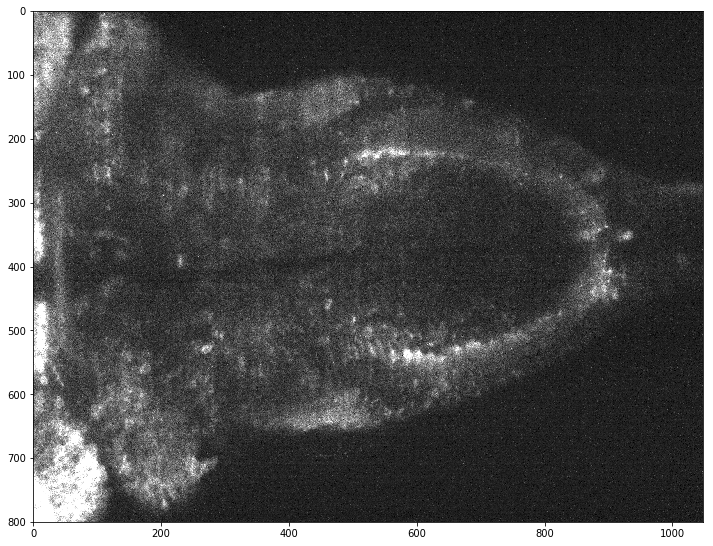

In [218]:
roi = (slice(0, 2000), slice(20,21), slice(0, 800), slice(1000, None))
sample = data[roi][0].compute(scheduler='threads')
fig, axs = plt.subplots(figsize=(12,12))
plt.imshow(sample.max(0), clim=(90, 180), cmap='gray')

In [219]:
ds_xy = 2
data_ds = coarsen(np.mean, data[roi], {2: ds_xy, 3: ds_xy}).astype(data.dtype).max(1)

In [220]:
import time
result = data_ds.compute()

distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


In [240]:
flk.window.Window(result)

/groups/ahrens/home/bennettd/anaconda3/lib/python3.6/site-packages/pyqtgraph/imageview/ImageView.py:588: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data = data[sl]


In [221]:
import sys
sys.getsizeof(result) >> 20

799

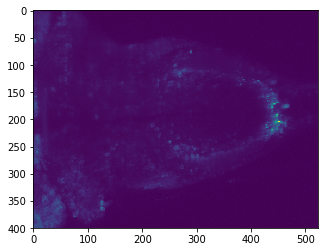

In [223]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(result.max(0))

In [224]:
result.shape

(2000, 400, 524)

In [225]:
import flika as flk
flk.start_flika()
flk.window.Window(result)

Starting flika
Starting flika inside IPython


/groups/ahrens/home/bennettd/anaconda3/lib/python3.6/site-packages/pyqtgraph/imageview/ImageView.py:588: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data = data[sl]


In [226]:
out_path = f'/groups/ahrens/ahrenslab/projects/ngm/sample_data/{exp_name}_t{roi[0].start}_t{roi[0].stop}.tif'

In [227]:
out_path

'/groups/ahrens/ahrenslab/projects/ngm/sample_data/20160113_4_2_cy14_7dpf_more_trial_t0_t2000.tif'

In [228]:
%%time
from skimage.io import imsave
raw_out = f'/groups/ahrens/ahrenslab/projects/ngm/sample_data/{exp_name}_t{roi[0].start}_t{roi[0].stop}.tif'
imsave(raw_out, result)

/groups/ahrens/home/bennettd/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: /groups/ahrens/ahrenslab/projects/ngm/sample_data/20160113_4_2_cy14_7dpf_more_trial_t0_t2000.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


CPU times: user 3.54 s, sys: 1.81 s, total: 5.36 s
Wall time: 4.92 s


In [229]:
os.stat(raw_out).st_size >> 20

799

In [237]:
import os
from zipfile import ZIP_DEFLATED
# zip compression: ~37%
zip_fname = f'/groups/ahrens/ahrenslab/davis/tmp/{exp_name}.zip'
try:
    os.remove(zip_fname)
except:
    pass
with ZipFile(zip_fname,'w') as zipf: 
        # writing each file one by one 
        zipf.write(raw_out, compress_type=ZIP_DEFLATED) 

In [236]:
os.stat(zip_fname).st_size >> 20

294